# End Sem PML - 29 Nov 2025 - Ashish Trivedi

In [1]:
print("_")
#input in image-data-ePGD-endsem.csv

_


## Q 1 EDA

### Steps : Understand the input data format and pupose of the exercise.

- Find the shape of data - Total row x columns 
   - Number of Rows: 5010
   - Number of Columns: 140
- As already given in input, verify that the first column has text - file names. Find the frequency of each file name to see if same file is being described more than once. An input for creating our context.
- Row wise analysis :
   - Find how many rows have null / missing values.
   - Find duplicate rows and remove them.
- Find the data type for each column - numeric, categorical, etc.
- For Numeric data the range of data should be found to help understand data better.
- Box plots shold be plotted for the feature under analysis to get feel of outliers, median and whisker positions.
- Histogram should be plotted for each feature to see the skewness of data and data distrbution in the column.



In [2]:
import pandas as pd

# 1. Read the CSV file
df = pd.read_csv('image-data-ePGD-endsem.csv')

# Get the number of rows and columns
rows, cols = df.shape
print(f'Number of Rows: {rows}')
print(f'Number of Columns: {cols}')

# Get the data type of each column
print('\nColumn Data Types:')
datatype_group = dict()
for i, dt in enumerate(df.dtypes):
    if dt in datatype_group:
        datatype_group[dt].append(i)
    else:
        datatype_group[dt] = [i]


print(datatype_group)

# 2. List rows and columns with missing data
print('\nRow indices with missing data:')
rows_with_missing_data = df[df.isnull().any(axis=1)]
print(rows_with_missing_data.index.tolist())

print('\nColumns with missing data:')
cols_with_missing_data = df.columns[df.isnull().any()].tolist()
print(cols_with_missing_data)

print('\nCells with missing data (row, column):')
missing_cells = []
for col in cols_with_missing_data:
    for row in rows_with_missing_data.index:
        if pd.isnull(df.loc[row, col]):
            missing_cells.append((row, col))
print(missing_cells)

Number of Rows: 5010
Number of Columns: 140

Column Data Types:
{dtype('O'): [0], dtype('int64'): [1, 2, 3, 4, 117, 118, 123, 124, 125, 136], dtype('float64'): [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 119, 120, 121, 122, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 137, 138, 139]}

Row indices with missing data:
[19, 934, 1639, 1999, 2434, 2545, 3448, 3999, 4887, 4926]

Columns with missing data:
['c1', 'c5', 'c8', 'c11', 'c14', 'c15', 'c16', 'c17', 'c18', 'c27', 'c30', 'c33', 'c53', 'c58', 'c68', 'c79', 'c122', 'c123']

Cells with missing data (row, column):
[(3999, '

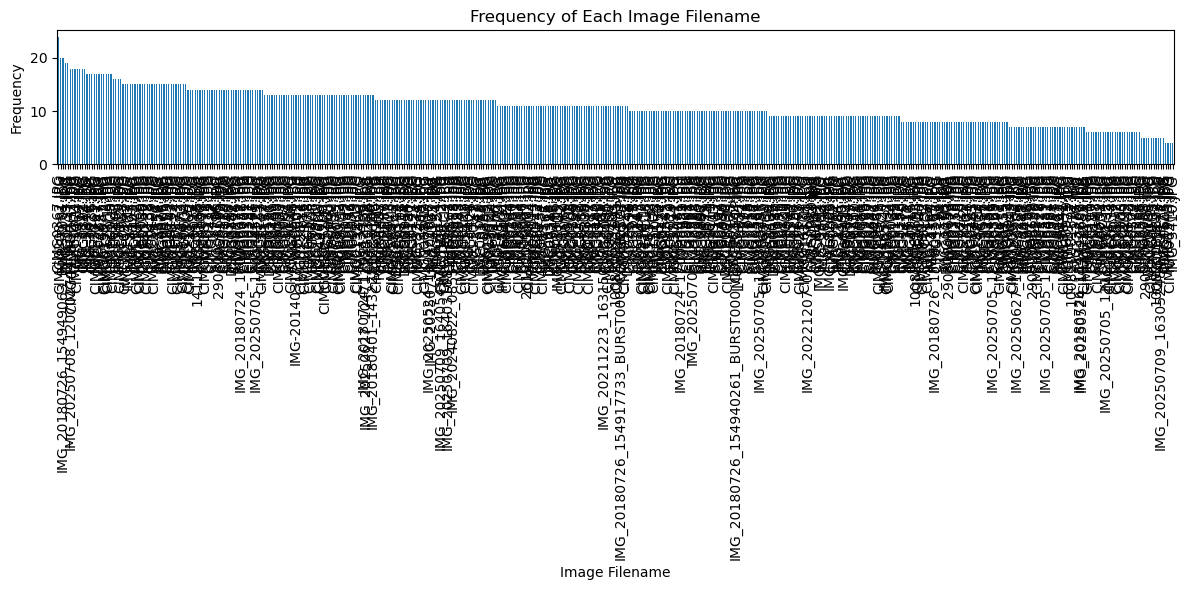


Duplicate Rows indices:
Index([5000, 5001, 5002, 5003, 5004, 5005, 5006, 5007, 5008, 5009], dtype='int64')

Number of duplicate rows: 10


In [3]:
import matplotlib.pyplot as plt

# Create a bar chart of the frequency of each name in the first column
plt.figure(figsize=(12, 6))
df.iloc[:, 0].value_counts().plot(kind='bar')
plt.title('Frequency of Each Image Filename')
plt.xlabel('Image Filename')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Find and list duplicate rows
duplicate_rows = df[df.duplicated()]
print('\nDuplicate Rows indices:')
print(duplicate_rows.index)

# Get the count of duplicate rows
num_duplicate_rows = len(duplicate_rows)
print(f'\nNumber of duplicate rows: {num_duplicate_rows}')

In [4]:
print(duplicate_rows.iloc[:,0])
print("Original data shape ", df.shape)
df = df.drop_duplicates()
print("cleaned duplicate rows. New data shape ", df.shape)

5000                  CIMG0757.JPG
5001                  CIMG0137.JPG
5002               CIMG0130(1).JPG
5003                  CIMG0054.JPG
5004             CIMG0108~2(1).JPG
5005                  IMG_3385.JPG
5006                  CIMG0428.JPG
5007                  IMG_3747.JPG
5008               CIMG0210(1).JPG
5009    IMG_20180724_170112733.jpg
Name: image_filename, dtype: object
Original data shape  (5010, 140)
cleaned duplicate rows. New data shape  (5000, 140)


## Question 2 A Box Plots and Histograms

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (X) and target (y)
X = df.drop(['image_filename', 'cell_number', 'cell_row', 'cell_col', 'label'] , axis=1)
y = df[['image_filename', 'cell_number', 'cell_row', 'cell_col', 'label']]

print(X.shape)
print(y.shape)
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train[:3][:3])
print(type(X_train))


(5000, 135)
(5000, 5)
            c1        c2        c3        c4        c5        c6        c7  \
4227  0.000000  0.081333  0.288667  0.347067  0.231867  0.049733  0.001333   
4676  0.010533  0.057733  0.126667  0.212933  0.280933  0.198000  0.095600   
800   0.000533  0.104933  0.073467  0.158400  0.380933  0.266133  0.015600   

          c8        c9       c10  ...   c126      c127        c128      c129  \
4227  0.0000  0.001600  0.189067  ...  118.0  0.321940  104.873733  6.925235   
4676  0.0176  0.018000  0.054400  ...  161.0  0.339107  103.397333  7.457787   
800   0.0000  0.001333  0.105867  ...  159.0  0.297792  106.220800  7.024195   

             c130          c131    c132         c133          c134      c135  
4227  1050.605275   8689.603763  721551  2831713.662  5.047826e+06  1.782605  
4676  2365.104165  11592.612920  970356  4707793.551  1.303049e+07  2.767855  
800   1178.005027  11825.864540  986410  3762395.161  5.072643e+06  1.348248  

[3 rows x 135 columns]
<cla

#### Handle missing data. Dropping missing data. The missing data is very less so this decision can be taken.

In [6]:
print(f'Original X_train shape: {X_train.shape}')

# Drop rows with any missing values
X_train = X_train.dropna()

print(f'New X_train shape after dropping NA: {X_train.shape}')

Original X_train shape: (4000, 135)
New X_train shape after dropping NA: (3991, 135)


In [7]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Standardize data for box plot.
plot_data = StandardScaler().fit_transform(X_train)


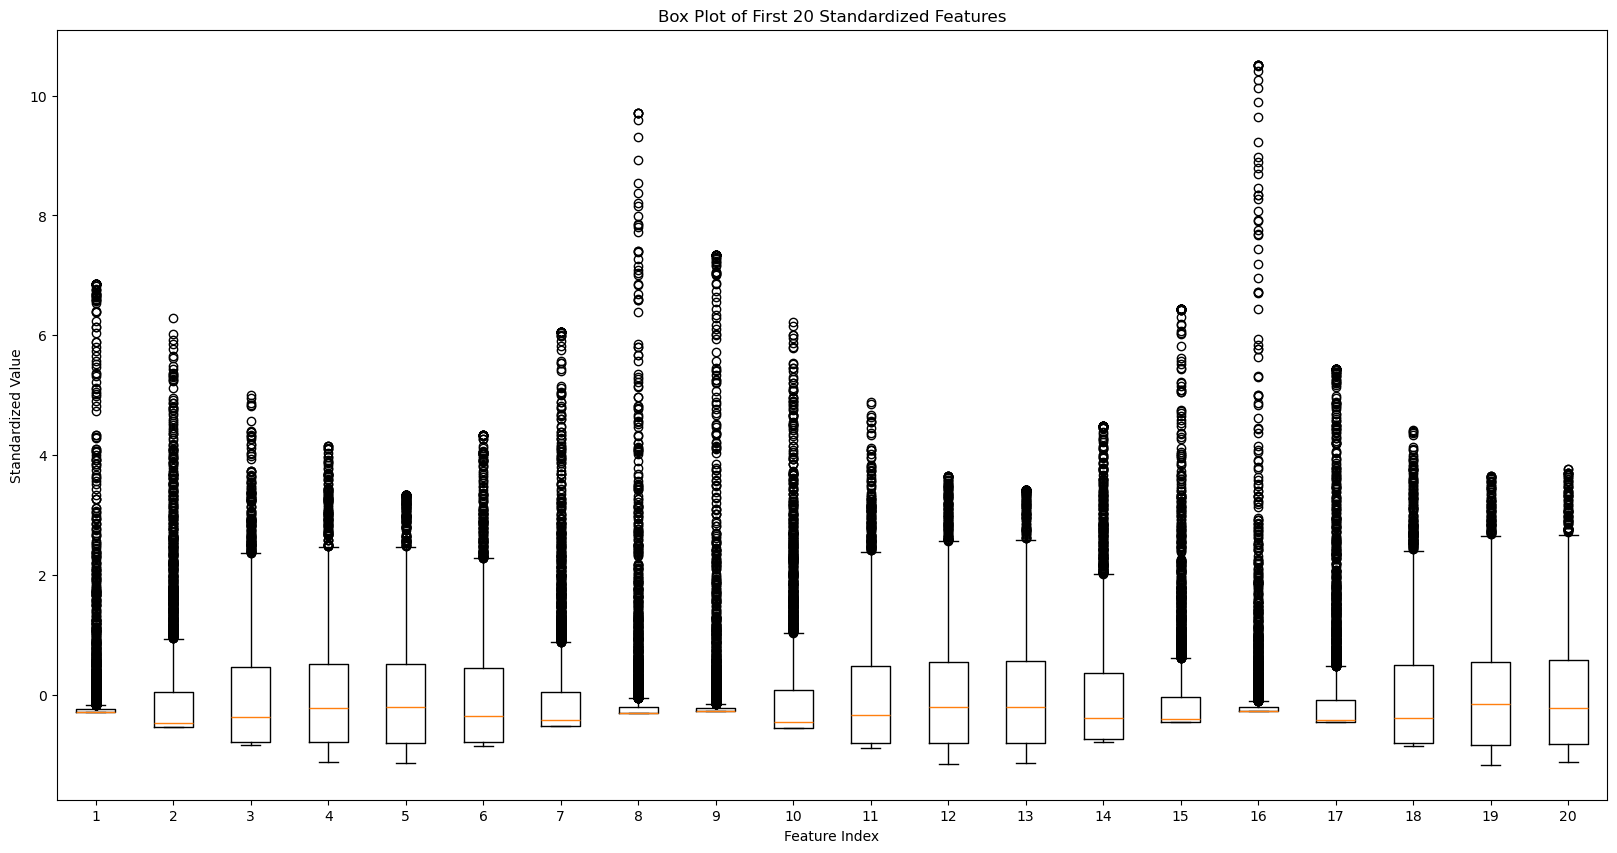

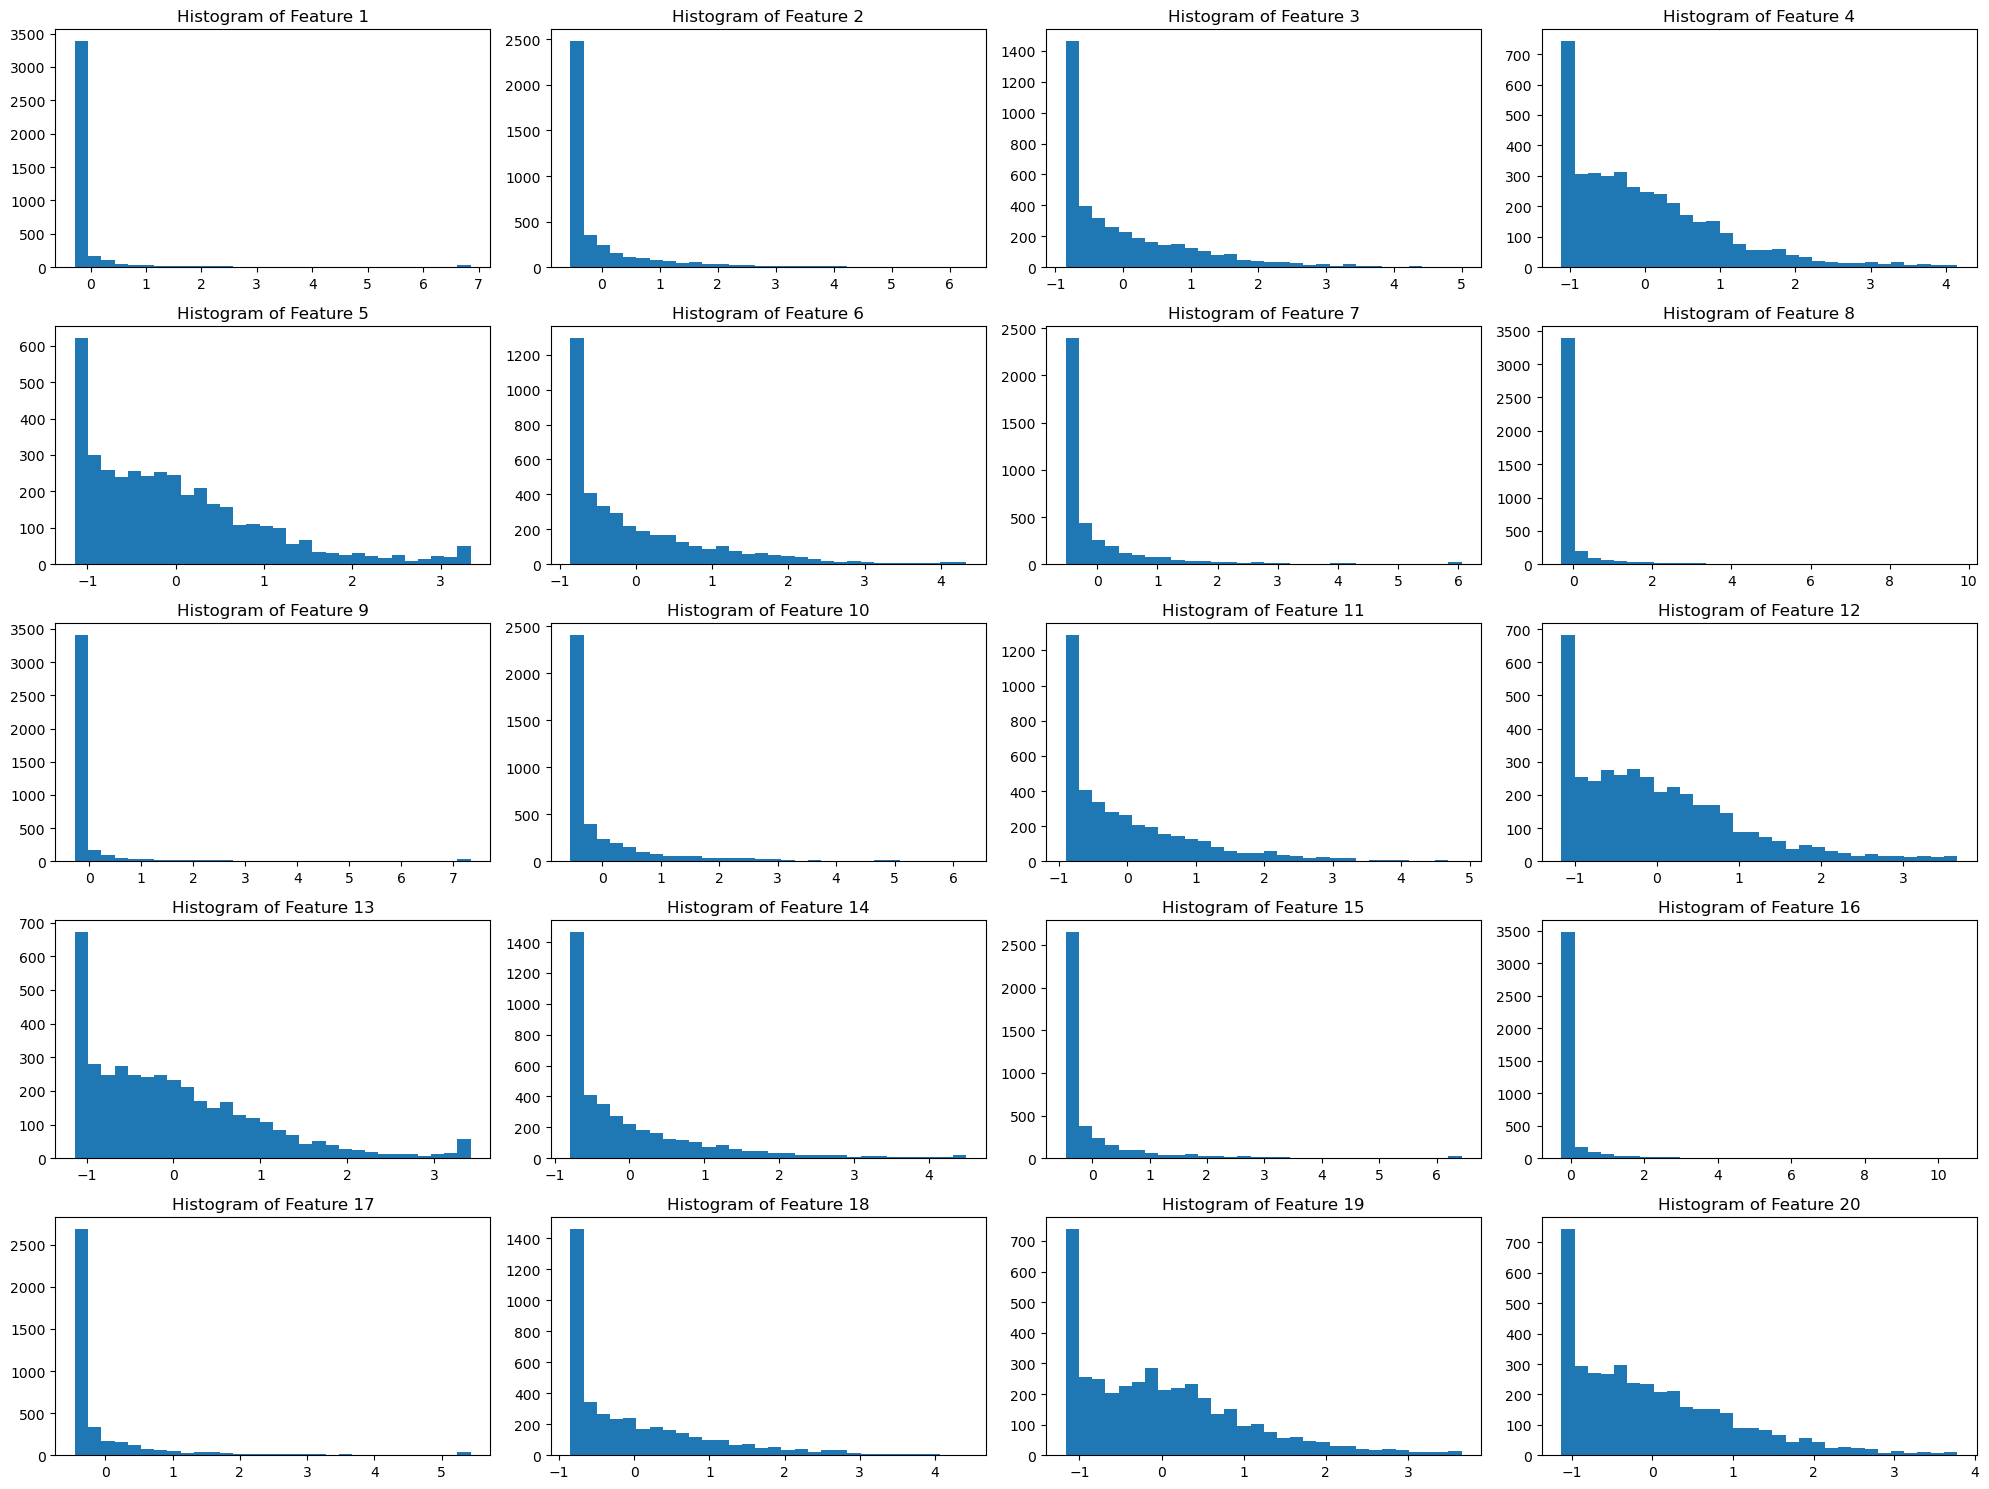

In [8]:
import matplotlib.pyplot as plt

# Select the first 20 columns
data_subset = plot_data[:, :20]

# Create a box plot for the first 20 columns
plt.figure(figsize=(20, 10))
plt.boxplot(data_subset)
plt.title('Box Plot of First 20 Standardized Features')
plt.xlabel('Feature Index')
plt.ylabel('Standardized Value')
plt.show()

# Create a histogram for the first 20 columns
plt.figure(figsize=(20, 15))
for i in range(data_subset.shape[1]):
    plt.subplot(5, 4, i + 1)
    plt.hist(data_subset[:, i], bins=30)
    plt.title(f'Histogram of Feature {i+1}')
plt.tight_layout()
plt.show()

### Q2 A Anser:  Box plots gives median location, outlier details as shown in above plots, where as the histogram is just giving frequency of values which are not the same.

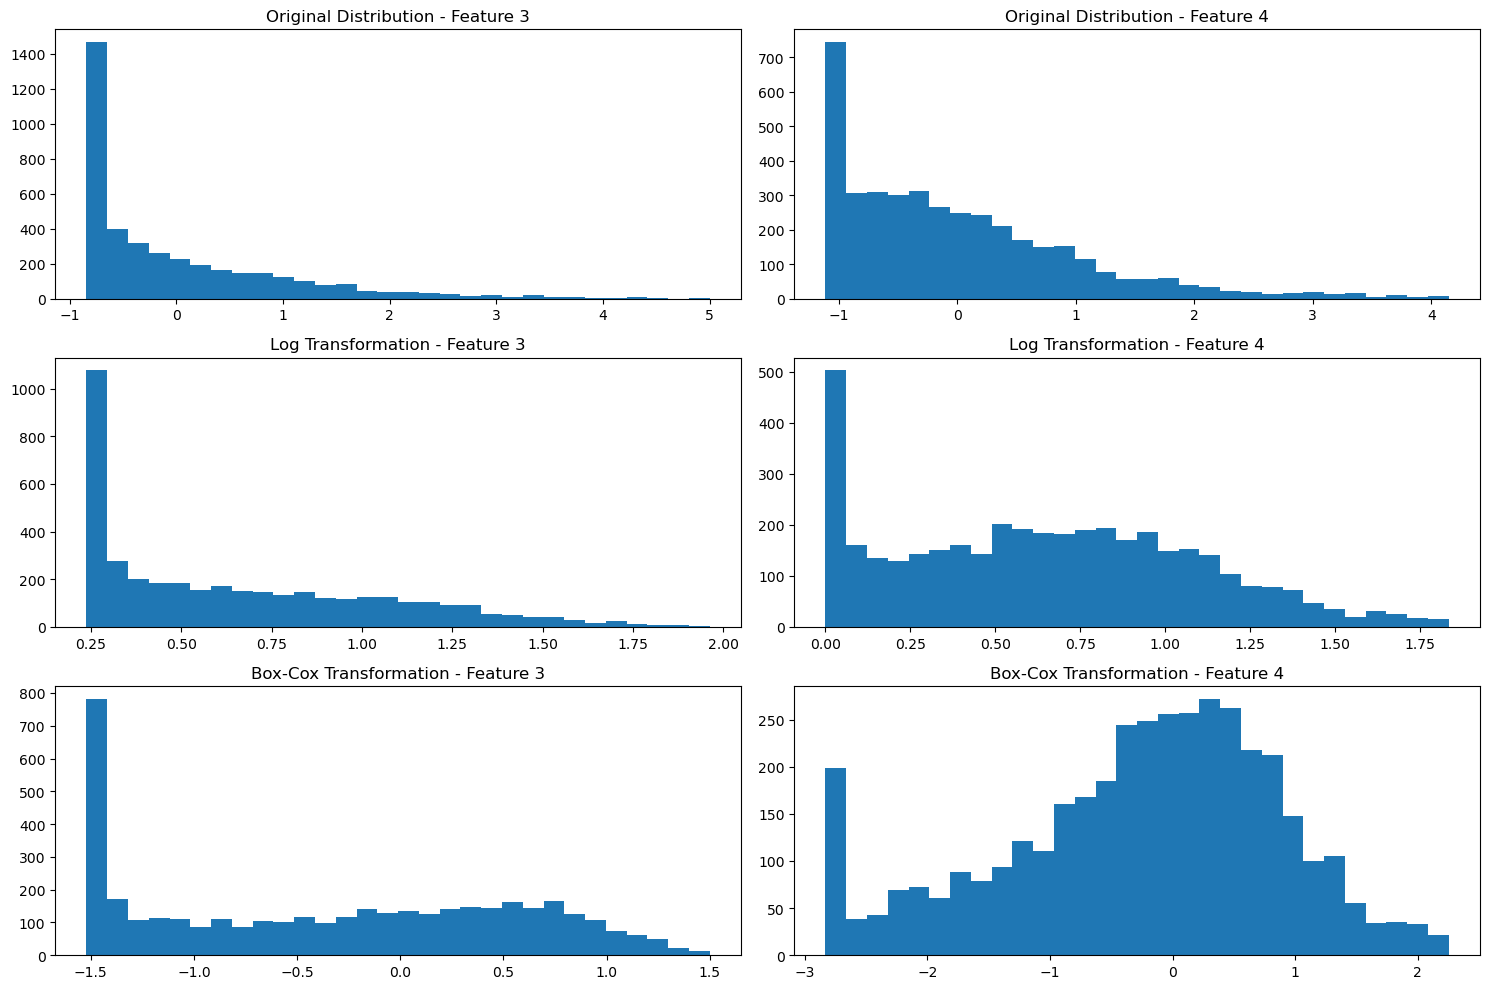

In [9]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Select columns 3 and 4 (indices 2 and 3)
skewed_data = plot_data[:, 2:4]

# --- Log Transformation ---
# Shift data to be positive for log transform
log_transformed_data = np.log1p(skewed_data - skewed_data.min())

# --- Box-Cox Transformation ---
# Shift data to be strictly positive for Box-Cox
positive_data = skewed_data - skewed_data.min() + 1e-6
boxcox_transformed_data_col3, _ = stats.boxcox(positive_data[:, 0])
boxcox_transformed_data_col4, _ = stats.boxcox(positive_data[:, 1])

# --- Visualize the transformations ---
plt.figure(figsize=(15, 10))

# Original Data
plt.subplot(3, 2, 1)
plt.hist(skewed_data[:, 0], bins=30)
plt.title('Original Distribution - Feature 3')

plt.subplot(3, 2, 2)
plt.hist(skewed_data[:, 1], bins=30)
plt.title('Original Distribution - Feature 4')

# Log Transformed Data
plt.subplot(3, 2, 3)
plt.hist(log_transformed_data[:, 0], bins=30)
plt.title('Log Transformation - Feature 3')

plt.subplot(3, 2, 4)
plt.hist(log_transformed_data[:, 1], bins=30)
plt.title('Log Transformation - Feature 4')

# Box-Cox Transformed Data
plt.subplot(3, 2, 5)
plt.hist(boxcox_transformed_data_col3, bins=30)
plt.title('Box-Cox Transformation - Feature 3')

plt.subplot(3, 2, 6)
plt.hist(boxcox_transformed_data_col4, bins=30)
plt.title('Box-Cox Transformation - Feature 4')

plt.tight_layout()
plt.show()

### Q 2 B conclusion : As we can see the Box-cox transformation was able to reduce the skew ness in Feature 4 from above plots.

## Q 2 E : Solution strategy:
- Since the cell number and row coulmns of identified feature is given, we can use a KNeighborsClassifier (KNC) 
- Framing the Problem for KNCYour goal is to use the row and column values as features to predict the feature_exists value (0 or 1).
- Use inputs : Features (X): row (0-7) and column (0-7). Target (y): feature_exists (0 or 1).
- We want to test if the target=1 for features is in columns [0,1, 6,7] or in row ranges [0,1,6,7] that means the assumption may be incorrect. In other case where majority of data is in other range of columns and rows, it will be correct in most cases..